<a href="https://colab.research.google.com/github/sathvikaanugu/603assignment/blob/main/assignment4_ASR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install basemap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import urllib.request
import time
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import requests



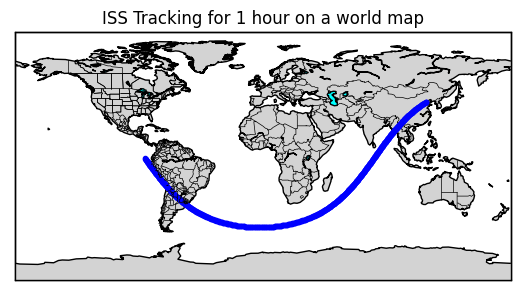

In [38]:

map=Basemap()

# draw coastlines, country boundaries, and fill the continents.
map.drawcoastlines()
map.drawcountries()



# set up empty lists to store longitude and latitude
longitudes = []
latitudes = []

start_time=time.time() #currentt time
end_time=start_time + 3600  #one hr in seconds

# loop for an hour (3600 seconds)
while time.time()<end_time:
    # get the data from the producer
    response = requests.get("http://api.open-notify.org/iss-now.json")
    data = json.loads(response.content)
    
    # extract the longitude and latitude from the data
    longitude = float(data['iss_position']['longitude'])
    latitude = float(data['iss_position']['latitude'])
    
    # append the longitude and latitude to the lists
    longitudes.append(longitude)
    latitudes.append(latitude)
    
    # plot the longitude and latitude on the map
    x, y = map(longitude, latitude)
    map.plot(x, y, marker="o", markersize=3, color="blue")
    
    # wait for 5 seconds before requesting new data
    time.sleep(5)

map.fillcontinents(color='lightgray',lake_color='aqua',zorder=0)
map.drawstates()
map.drawmapboundary(fill_color='white')


# show the map
plt.title("ISS Tracking for 1 hour on a world map")
plt.show()
